*To be run on Sage kernel, with eel installed*

In [1]:
from hourglass import App

# retreive example data for constructor
from examples import example_2, example_1, benzene_debug, benzene_and_square
g = example_2()

app = App(graph=g)

"""
Initializes server at http://localhost:8000/draw.html
Open in browser for now (easier to debug)
"""

app.start()

Editor Closed.


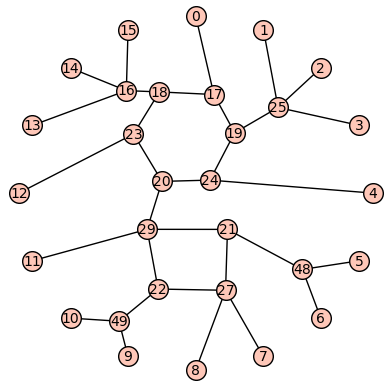

In [2]:
g = app.conv_to_sage()
g.show()